# Sprint 深層学習スクラッチ ディープニューラルネットワーク

## 1.このSprintについて

Sprintの目的
スクラッチを通してニューラルネットワークの発展的内容を理解する

どのように学ぶか
スクラッチで作成したニューラルネットワークの実装を拡張していきます。

## 2.ディープニューラルネットワークスクラッチ

前回は3層のニューラルネットワークを作成しましたが、今回はこれを任意の層数に拡張しやすいものに書き換えていきます。その上で、活性化関数や初期値、最適化手法について発展的なものを扱えるようにしていきます。


このようなスクラッチを行うことで、今後各種フレームワークを利用していくにあたり、内部の動きが想像できることを目指します。


名前は新しくScratchDeepNeuralNetrowkClassifierクラスとしてください。

## 層などのクラス化
クラスにまとめて行くことで、構成を変更しやすい実装にしていきます。


手を加える箇所


- 層の数
- 層の種類（今後畳み込み層など他のタイプの層が登場する）
- 活性化関数の種類
- 重みやバイアスの初期化方法
- 最適化手法

そのために、全結合層、各種活性化関数、重みやバイアスの初期化、最適化手法それぞれのクラスを作成します。


実装方法は自由ですが、簡単な例を紹介します。サンプルコード1のように全結合層と活性化関数のインスタンスを作成し、サンプルコード2,3のようにして使用します。それぞれのクラスについてはこのあと解説します。

### 《サンプルコード1》


ScratchDeepNeuralNetrowkClassifierのfitメソッド内



```
# self.sigma : ガウス分布の標準偏差
# self.lr : 学習率
# self.n_nodes1 : 1層目のノード数
# self.n_nodes2 : 2層目のノード数
# self.n_output : 出力層のノード数
optimizer = SGD(self.lr)
self.FC1 = FC(self.n_features, self.n_nodes1, SimpleInitializer(self.sigma), optimizer)
self.activation1 = Tanh()
self.FC2 = FC(self.n_nodes1, self.n_nodes2, SimpleInitializer(self.sigma), optimizer)
self.activation2 = Tanh()
self.FC3 = FC(self.n_nodes2, self.n_output, SimpleInitializer(self.sigma), optimizer)
self.activation3 = Softmax()
```

### 《サンプルコード2》


イテレーションごとのフォワード

```
A1 = self.FC1.forward(X)
Z1 = self.activation1.forward(A1)
A2 = self.FC2.forward(Z1)
Z2 = self.activation2.forward(A2)
A3 = self.FC3.forward(Z2)
Z3 = self.activation3.forward(A3)
```

### 《サンプルコード3》


イテレーションごとのバックワード

```
dA3 = self.activation3.backward(Z3, Y) # 交差エントロピー誤差とソフトマックスを合わせている
dZ2 = self.FC3.backward(dA3)
dA2 = self.activation2.backward(dZ2)
dZ1 = self.FC2.backward(dA2)
dA1 = self.activation1.backward(dZ1)
dZ0 = self.FC1.backward(dA1) # dZ0は使用しない
```

## 【準備】（ライブラリインポート・データ読み込み）

In [1]:
# ライブラリインポート
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics 
from keras.datasets import mnist
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# データ読み込み
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 平滑化
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# 前処理
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

11493376/11490434 [==============================] - 0s 0us/step
1.0
0.0


In [3]:
# # テスト実行用
# X_train = X_train[:10000, :]
# y_train = y_train[:10000]

## 【まとめ】最終コード


#### ScratchDeepNeuralNetrowkClassifier

In [4]:
class ScratchDeepNeuralNetrowkClassifier:
    """
    シンプルな三層ニューラルネットワーク分類器
 
    Parameters
    ----------
    sigma : float
      シグマの値
    lr : float
      学習率
    epoch : int
      エポック数
    verbose : bool
      学習過程表示・非表示
    interval : int
      学習過程の表示間隔
 
    Attributes
    ----------
    """
    def __init__(self, verbose=True, interval=1):
        self.verbose = verbose
        self.interval = interval

    
    def fit(self, X, y, X_val=None, y_val=None, sigma=0.01, lr=0.01, epoch=3, optimizer='SGD'):
        """
        ニューラルネットワーク分類器を学習する。
 
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        # 引数をインスタンス変数へ
        self.sigma = sigma
        self.lr = lr
        self.epoch = epoch

        # 検証データの有無
        self.is_val = np.all(X_val != None) and np.all(y_val != None)

        # 形状・各層のノード数
        self.n_samples = X.shape[0]
        self.n_features = X.shape[1]
        self.inputLayer_nodes = self.n_features
        self.middleLayer1_nodes = 400
        self.middleLayer2_nodes = 200
        self.outputLayer_nodes = 10
        self.optimizer = optimizer

        # 誤差格納用
        self.loss = []
        self.val_loss = []

        # yラベルデータをone-hotへ変換
        y = self._y_one_hot(y)
        if self.is_val:
            y_val = self._y_one_hot(y_val)

        # 最適化手法
        if self.optimizer == 'SGD':
            optimizer = SGD(self.lr)
        elif self.optimizer == 'AdaGrad':
            optimizer = AdaGrad(self.lr)

        # 各層・活性化関数のインスタンス生成
        self.FC1 = FC(SimpleInitializer(self.sigma, self.inputLayer_nodes, self.middleLayer1_nodes), optimizer)
        self.activation1 = Tanh()
        self.FC2 = FC(SimpleInitializer(self.sigma, self.middleLayer1_nodes, self.middleLayer2_nodes), optimizer)
        self.activation2 = Tanh()
        self.FC3 = FC(SimpleInitializer(self.sigma, self.middleLayer2_nodes, self.outputLayer_nodes), optimizer)
        self.activation3 = Softmax()

        # ミニバッチのインスタンス生成
        batch_size = 20
        seed = 47
        getMiniBatch = GetMiniBatch(X, y, batch_size=batch_size, seed=seed)
        if self.is_val:
            val_batch_size = int(X_val.shape[0] / (self.n_samples/batch_size))
            getValMiniBatch = GetMiniBatch(X_val, y_val, batch_size=val_batch_size, seed=seed)
        else:
            getValMiniBatch = np.zeros([self.n_samples, 2])

        for epoch in range(self.epoch):
            for train, val in zip(getMiniBatch, getValMiniBatch):
                mini_X, mini_y = train
                mini_X_val, mini_y_val = val

                # フォワードプロパゲーション
                Z3 = self._forward_propagation(mini_X)
                # バックプロパゲーション
                self._back_propagation(mini_X, mini_y, Z3)

                if self.is_val:
                    # フォワードプロパゲーション
                    val_Z3 = self._forward_propagation(mini_X_val)
                    # 損失関数計算
                    self.activation3.cross_entropy_loss(val_Z3, mini_y_val, self.is_val)

            # バッチ毎の損失の平均取得
            self._get_loss()

            # 学習過程表示
            if self.verbose and epoch % self.interval == 0:
                self._print_loss(epoch)



    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。
 
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
 
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        # 推定
        pred = np.argmax(self._forward_propagation(X), axis=1)
        return pred


    def _y_one_hot(self, y):
        """
        yラベルをone-hot化する処理
        """
        y_onehot = np.zeros([len(y), self.outputLayer_nodes])
        for i, yk in enumerate(y):
            y_onehot[i,yk] = 1
        return y_onehot


    def _forward_propagation(self, X):
        """
        フォワードプロパゲーション
        """
        A1 = self.FC1.forward(X)
        Z1 = self.activation1.forward(A1)
        A2 = self.FC2.forward(Z1)
        Z2 = self.activation2.forward(A2)
        A3 = self.FC3.forward(Z2)
        Z3 = self.activation3.forward(A3)
        return Z3


    def _back_propagation(self, X, y, Z3):
        """
        バックプロパゲーション
        """
        dA3 = self.activation3.backward(Z3, y) # 交差エントロピー誤差とソフトマックスを合わせている
        dZ2 = self.FC3.backward(dA3)
        dA2 = self.activation2.backward(dZ2)
        dZ1 = self.FC2.backward(dA2)
        dA1 = self.activation1.backward(dZ1)
        _ = self.FC1.backward(dA1)


    def _get_loss(self):
        """
        損失取得処理
        """
        self.loss.append(np.mean(self.activation3.loss))
        self.activation3.loss = []
        if self.is_val:
            self.val_loss.append(np.mean(self.activation3.val_loss))
            self.activation3.val_loss = []


    def _print_loss(self, epoch):
        """
        学習過程表示用
        """
        print('[INFO] epoch : {} / {}'.format(epoch+1, self.epoch))
        print('       Loss(train): {}'.format(self.loss[-1]))
        print('       Loss(test) : {}'.format(self.val_loss[-1]))

#### FC

In [5]:
class FC:
    """
    ノード数n_nodes1からn_nodes2への全結合層
    Parameters
    ----------
    n_nodes1 : int
      前の層のノード数
    n_nodes2 : int
      後の層のノード数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """
    def __init__(self, initializer, optimizer):
        self.optimizer = optimizer
        # w,bの初期化
        self.W = initializer.W()
        self.B = initializer.B()
        self.H_W = np.zeros(self.W.shape[1]) + 1e-7
        self.H_B = np.zeros(self.B.shape[1]) + 1e-7

        
    def forward(self, X):
        """
        フォワード
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes2)
            出力
        """
        self.batch_size = X.shape[0]
        self.X = X
        A = X @ self.W + self.B
        return A


    def backward(self, dA):
        """
        バックワード
        Parameters
        ----------
        dA : 次の形のndarray, shape (batch_size, n_nodes2)
            後ろから流れてきた勾配
        Returns
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes1)
            前に流す勾配
        """
        self.dW = self.X.T @ dA
        self.dB = np.sum(dA, axis=0)
        dZ = dA @ self.W.T
        # 更新
        self.optimizer.update(self)
        return dZ

#### 初期化（SimpleInitializer・XavierInitializer・HeInitializer）

In [6]:
class SimpleInitializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self, sigma, n_nodes1, n_nodes2):
        self.sigma = sigma
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.mean = 0
        self.s = 1

    def W(self):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数
 
        Returns
        ----------
        W :
        """
        W = self.sigma * np.random.normal(loc=self.mean, scale=self.s, size=(self.n_nodes1, self.n_nodes2))
        return W


    def B(self):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数
 
        Returns
        ----------
        B :
        """
        # B = self.sigma * np.random.normal(loc=self.mean, scale=self.s, size=(1, self.n_nodes2))
        B = np.zeros([1, self.n_nodes2])
        return B


class XavierInitializer(SimpleInitializer):
    def __init__(self, sigma, n_nodes1, n_nodes2):
        super().__init__(sigma, n_nodes1, n_nodes2)
        self.sigma = 1
        self.s = 1 / np.sqrt(n_nodes1)
        pass


class HeInitializer(SimpleInitializer):
    def __init__(self, sigma, n_nodes1, n_nodes2):
        super().__init__(sigma, n_nodes1, n_nodes2)
        self.sigma = 1
        self.s = np.sqrt(2 / self.n_nodes1)
    pass



#### 最適化手法（SGD・AdaGrad）

In [7]:
class SGD:
    """
    確率的勾配降下法
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr):
        self.lr = lr

    def update(self, layer):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer : 更新前の層のインスタンス
        """
        layer.W -= self.lr * layer.dW / layer.batch_size
        layer.B -= self.lr * layer.dB / layer.batch_size

        return layer.W, layer.B

class AdaGrad():
    def __init__(self, lr):
        self.lr = lr
        

    def update(self, layer):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer : 更新前の層のインスタンス
        """
        layer.H_W += np.sum(layer.dW / layer.batch_size, axis=0)**2
        layer.W -= self.lr / np.sqrt(layer.H_W + 1e-7) * (layer.dW / layer.batch_size)

        layer.H_B += np.sum(layer.dB / layer.batch_size, axis=0)**2
        layer.B -= self.lr / np.sqrt(layer.H_B + 1e-7) * (layer.dB / layer.batch_size)

        return layer.W, layer.B
    

#### 活性化関数

In [8]:
class Softmax:
    def __init__(self):
        self.loss = []
        self.val_loss = []
        pass

    def forward(self, A):
        A -= np.max(A)   # オーバーフロー対策
        self.Z = np.exp(A) / np.sum(np.exp(A), axis=1).reshape(-1, 1)
        return self.Z

    def backward(self, Z, Y):
        dA = Z - Y
        self.cross_entropy_loss(Z, Y)
        return dA
    
    def cross_entropy_loss(self, Z, Y, val=False):
        batch_size = Z.shape[0]
        delta = 1e-7
        loss = - np.sum(Y * np.log(Z + delta)) / batch_size
        if not val:
            self.loss.append(loss)
        else:
            self.val_loss.append(loss)
        return loss


class Tanh:
    def __init__(self):
        pass

    def forward(self, A):
        self.Z = np.tanh(A)
        return self.Z

    def backward(self, dZ):
        dA = dZ * (1 - dZ**2)
        return dA


class ReLU:
    def __init__(self):
        pass

    def forward(self, A):
        self.Z = np.where(A <= 0, 0, A) + 1e-8
        return self.Z

    def backward(self, dZ):
        dA = np.where(dZ <= 0, 0, 1)  + 1e-8
        return dA

In [9]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ
 
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [10]:
dnn = ScratchDeepNeuralNetrowkClassifier(verbose=True, interval=1)
dnn.fit(X_train, y_train, X_val=X_test, y_val=y_test, sigma=0.01, lr=0.01, epoch=10, optimizer='AdaGrad')

[INFO] epoch : 1 / 10
       Loss(train): 4.362355962375406
       Loss(test) : 4.344692812195481
[INFO] epoch : 2 / 10
       Loss(train): 2.722522191867062
       Loss(test) : 2.6962266135998023
[INFO] epoch : 3 / 10
       Loss(train): 2.208423996586261
       Loss(test) : 2.159479658810455
[INFO] epoch : 4 / 10
       Loss(train): 1.9081738876118053
       Loss(test) : 1.877491751204615
[INFO] epoch : 5 / 10
       Loss(train): 1.7206913669866832
       Loss(test) : 1.6818752683718607
[INFO] epoch : 6 / 10
       Loss(train): 1.5998291360552843
       Loss(test) : 1.5588048694263943
[INFO] epoch : 7 / 10
       Loss(train): 1.5096723184704242
       Loss(test) : 1.4667370756924114
[INFO] epoch : 8 / 10
       Loss(train): 1.4375994622225352
       Loss(test) : 1.3973612247047058
[INFO] epoch : 9 / 10
       Loss(train): 1.3785317540837057
       Loss(test) : 1.3385692467886308
[INFO] epoch : 10 / 10
       Loss(train): 1.3289549386463386
       Loss(test) : 1.290192157107539


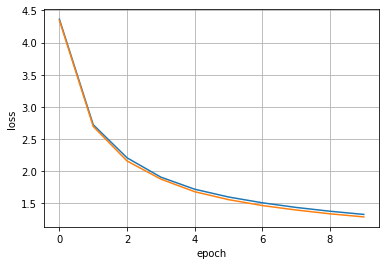

In [11]:
plt.plot(dnn.loss)
plt.plot(dnn.val_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.show()

## 【問題1】全結合層のクラス化
全結合層のクラス化を行なってください。


以下に雛形を載せました。コンストラクタで重みやバイアスの初期化をして、あとはフォワードとバックワードのメソッドを用意します。重みW、バイアスB、およびフォワード時の入力Xをインスタンス変数として保持しておくことで、煩雑な入出力は不要になります。


なお、インスタンスも引数として渡すことができます。そのため、初期化方法のインスタンスinitializerをコンストラクタで受け取れば、それにより初期化が行われます。渡すインスタンスを変えれば、初期化方法が変えられます。


また、引数として自身のインスタンスselfを渡すこともできます。これを利用してself.optimizer.update(self)という風に層の重みの更新が可能です。更新に必要な値は複数ありますが、全て全結合層が持つインスタンス変数にすることができます。


初期化方法と最適化手法のクラスについては後述します。

### 《雛形》

```
class FC:
    """
    ノード数n_nodes1からn_nodes2への全結合層
    Parameters
    ----------
    n_nodes1 : int
      前の層のノード数
    n_nodes2 : int
      後の層のノード数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer
        # 初期化
        # initializerのメソッドを使い、self.Wとself.Bを初期化する
        pass
    def forward(self, X):
        """
        フォワード
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes2)
            出力
        """        
        pass
        return A
    def backward(self, dA):
        """
        バックワード
        Parameters
        ----------
        dA : 次の形のndarray, shape (batch_size, n_nodes2)
            後ろから流れてきた勾配
        Returns
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes1)
            前に流す勾配
        """
        pass
        # 更新
        self = self.optimizer.update(self)
        return dZ
```

## 【問題2】初期化方法のクラス化
初期化を行うコードをクラス化してください。


前述のように、全結合層のコンストラクタに初期化方法のインスタンスを渡せるようにします。以下の雛形に必要なコードを書き加えていってください。標準偏差の値（sigma）はコンストラクタで受け取るようにすることで、全結合層のクラス内にこの値（sigma）を渡さなくてすむようになります。


これまで扱ってきた初期化方法はSimpleInitializerクラスと名付けることにします。



### 《雛形》

```
class SimpleInitializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
      ガウス分布の標準偏差
    """
    def __init__(self, sigma):
        self.sigma = sigma
    def W(self, n_nodes1, n_nodes2):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        W :
        """
        pass
        return W
    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        B :
        """
        pass
        return B
```

## 【問題3】最適化手法のクラス化
最適化手法のクラス化を行なってください。


最適化手法に関しても初期化方法同様に全結合層にインスタンスとして渡します。バックワードのときにself.optimizer.update(self)のように更新できるようにします。以下の雛形に必要なコードを書き加えていってください。


これまで扱ってきた最適化手法はSGDクラス（Stochastic Gradient Descent、確率的勾配降下法）として作成します。

### 雛形

```
class SGD:
    """
    確率的勾配降下法
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr):
        self.lr = lr
    def update(self, layer):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer : 更新前の層のインスタンス
        """
```

## 【問題4】活性化関数のクラス化
活性化関数のクラス化を行なってください。


ソフトマックス関数のバックプロパゲーションには交差エントロピー誤差の計算も含む実装を行うことで計算が簡略化されます。

### 発展的要素
活性化関数や重みの初期値、最適化手法に関してこれまで見てきた以外のものを実装していきます。

## 【問題5】ReLUクラスの作成
現在一般的に使われている活性化関数であるReLU（Rectified Linear Unit）をReLUクラスとして実装してください。


ReLUは以下の数式です。

$$
f(x) = ReLU(x) = \begin{cases}
x  & \text{if $x>0$,}\\
0 & \text{if $x\leqq0$.}
\end{cases}
$$

x
 : ある特徴量。スカラー


実装上はnp.maximumを使い配列に対してまとめて計算が可能です。


numpy.maximum — NumPy v1.15 Manual


一方、バックプロパゲーションのための 
$x$ に関する $f(x)$ の微分は以下のようになります。

$$
\frac{\partial f(x)}{\partial x} = \begin{cases}
1  & \text{if $x>0$,}\\
0 & \text{if $x\leqq0$.}
\end{cases}
$$

数学的には微分可能ではないですが、 
x
=
0
 のとき 
0
 とすることで対応しています。


フォワード時の 
x
 の正負により、勾配を逆伝播するかどうかが決まるということになります。

## 【問題6】重みの初期値
ここまでは重みやバイアスの初期値は単純にガウス分布で、標準偏差をハイパーパラメータとして扱ってきました。しかし、どのような値にすると良いかが知られています。シグモイド関数やハイパボリックタンジェント関数のときは Xavierの初期値 （またはGlorotの初期値）、ReLUのときは Heの初期値 が使われます。


XavierInitializerクラスと、HeInitializerクラスを作成してください。

## Xavierの初期値
Xavierの初期値における標準偏差 
σ
 は次の式で求められます。

$$
\sigma = \frac{1}{\sqrt{n}}
$$


n
 : 前の層のノード数

### 《論文》

<a href="http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf" style="text-decoration:none">
  Glorot, X., & Bengio, Y. (n.d.). Understanding the difficulty of training deep feedforward neural networks.
</a>

Heの初期値
Heの初期値における標準偏差 
$\sigma$
 は次の式で求められます。

$$
\sigma = \sqrt{\frac{2}{n}}
$$

n
 : 前の層のノード数


## 【問題7】最適化手法
学習率は学習過程で変化させていく方法が一般的です。基本的な手法である AdaGrad のクラスを作成してください。


まず、これまで使ってきたSGDを確認します。

$$
W_i^{\prime} = W_i - \alpha E(\frac{\partial L}{\partial W_i}) \\
B_i^{\prime} = B_i - \alpha E(\frac{\partial L}{\partial B_i})
$$

α
 : 学習率（層ごとに変えることも可能だが、基本的には全て同じとする）


∂
L
∂
W
i
 : 
W
i
 に関する損失 
L
 の勾配


∂
L
∂
B
i
 : 
B
i
 に関する損失 
L
 の勾配


E
(
)
 : ミニバッチ方向にベクトルの平均を計算


続いて、AdaGradです。バイアスの数式は省略しますが、重みと同様のことをします。


更新された分だけその重みに対する学習率を徐々に下げていきます。イテレーションごとの勾配の二乗和 
H
 を保存しておき、その分だけ学習率を小さくします。


学習率は重み一つひとつに対して異なることになります。

$$
H_i^{\prime}  = H_i+E(\frac{\partial L}{\partial W_i})×E(\frac{\partial L}{\partial W_i})\\
W_i^{\prime} = W_i - \alpha \frac{1}{\sqrt{H_i^{\prime} }} E(\frac{\partial L}{\partial W_i}) \\
$$

H
i
 : i層目に関して、前のイテレーションまでの勾配の二乗和（初期値は0）


H
′
i
 : 更新した 
H
i


### 《論文》

<a href="https://www.jmlr.org/papers/volume12/duchi11a/duchi11a.pdf" style="text-decoration:none">
Duchi JDUCHI, J., & Singer, Y. (2011). Adaptive Subgradient Methods for Online Learning and Stochastic Optimization * Elad Hazan. Journal of Machine Learning Research (Vol. 12).
</a>

## 【問題8】クラスの完成
任意の構成で学習と推定が行えるScratchDeepNeuralNetrowkClassifierクラスを完成させてください。

## 3.検証

## 【問題9】学習と推定
層の数や活性化関数を変えたいくつかのネットワークを作成してください。そして、MNISTのデータを学習・推定し、Accuracyを計算してください。

### SGD + tanh + SimpleInitializer + 中間層：2層

In [12]:
class ScratchDeepNeuralNetrowkClassifierForTest1(ScratchDeepNeuralNetrowkClassifier):
    """
    テスト実施用。必要箇所だけオーバーライド。
    """
    def fit(self, X, y, X_val=None, y_val=None, sigma=0.01, lr=0.01, epoch=3, optimizer='SGD'):

        # 引数をインスタンス変数へ
        self.sigma = sigma
        self.lr = lr
        self.epoch = epoch

        # 検証データの有無
        self.is_val = np.all(X_val != None) and np.all(y_val != None)

        # 形状・各層のノード数
        self.n_samples = X.shape[0]
        self.n_features = X.shape[1]
        self.inputLayer_nodes = self.n_features
        self.middleLayer1_nodes = 400
        self.middleLayer2_nodes = 200
        self.outputLayer_nodes = 10
        self.optimizer = optimizer

        # 誤差格納用
        self.loss = []
        self.val_loss = []

        # yラベルデータをone-hotへ変換
        y = self._y_one_hot(y)
        if self.is_val:
            y_val = self._y_one_hot(y_val)

        # 最適化手法
        if self.optimizer == 'SGD':
            optimizer = SGD(self.lr)
        elif self.optimizer == 'AdaGrad':
            optimizer = AdaGrad(self.lr)

        # 各層・活性化関数のインスタンス生成
        self.FC1 = FC(SimpleInitializer(self.sigma, self.inputLayer_nodes, self.middleLayer1_nodes), optimizer)
        self.activation1 = Tanh()
        self.FC2 = FC(SimpleInitializer(self.sigma, self.middleLayer1_nodes, self.middleLayer2_nodes), optimizer)
        self.activation2 = Tanh()
        self.FC3 = FC(SimpleInitializer(self.sigma, self.middleLayer2_nodes, self.outputLayer_nodes), optimizer)
        self.activation3 = Softmax()

        # ミニバッチのインスタンス生成
        batch_size = 20
        seed = 47
        getMiniBatch = GetMiniBatch(X, y, batch_size=batch_size, seed=seed)
        if self.is_val:
            val_batch_size = int(X_val.shape[0] / (self.n_samples/batch_size))
            getValMiniBatch = GetMiniBatch(X_val, y_val, batch_size=val_batch_size, seed=seed)
        else:
            getValMiniBatch = np.zeros([self.n_samples, 2])

        for epoch in range(self.epoch):
            for train, val in zip(getMiniBatch, getValMiniBatch):
                mini_X, mini_y = train
                mini_X_val, mini_y_val = val

                # フォワードプロパゲーション
                Z3 = self._forward_propagation(mini_X)
                # バックプロパゲーション
                self._back_propagation(mini_X, mini_y, Z3)

                if self.is_val:
                    # フォワードプロパゲーション
                    val_Z3 = self._forward_propagation(mini_X_val)
                    # 損失関数計算
                    self.activation3.cross_entropy_loss(val_Z3, mini_y_val, self.is_val)

            # バッチ毎の損失の平均取得
            self._get_loss()

            # 学習過程表示
            if self.verbose and epoch % self.interval == 0:
                self._print_loss(epoch)


In [13]:
dnn_test1 = ScratchDeepNeuralNetrowkClassifierForTest1(verbose=True, interval=1)
dnn_test1.fit(X_train, y_train, X_val=X_test, y_val=y_test, sigma=0.01, lr=0.1, epoch=10, optimizer='SGD')
pred1 = dnn_test1.predict(X_test)

[INFO] epoch : 1 / 10
       Loss(train): 0.47908277247336234
       Loss(test) : 0.46404213557070473
[INFO] epoch : 2 / 10
       Loss(train): 0.30409192716748795
       Loss(test) : 0.2999330887154195
[INFO] epoch : 3 / 10
       Loss(train): 0.2902631246322821
       Loss(test) : 0.29103473593778706
[INFO] epoch : 4 / 10
       Loss(train): 0.27989078234066783
       Loss(test) : 0.283203480988978
[INFO] epoch : 5 / 10
       Loss(train): 0.27432149887869745
       Loss(test) : 0.2789048578936618
[INFO] epoch : 6 / 10
       Loss(train): 0.271227515718435
       Loss(test) : 0.27648378599860085
[INFO] epoch : 7 / 10
       Loss(train): 0.2709192427481575
       Loss(test) : 0.2781387562362188
[INFO] epoch : 8 / 10
       Loss(train): 0.27022873614745063
       Loss(test) : 0.2847069500632246
[INFO] epoch : 9 / 10
       Loss(train): 0.2682763870330498
       Loss(test) : 0.282492917681186
[INFO] epoch : 10 / 10
       Loss(train): 0.2696724514955677
       Loss(test) : 0.27992144126

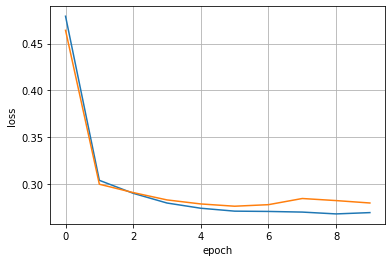

正解率： 0.9213


In [14]:
plt.plot(dnn_test1.loss)
plt.plot(dnn_test1.val_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.show()

print('正解率：', metrics.accuracy_score(y_test, pred1))

### AdaGrad + tanh + SimpleInitializer + 中間層：2層

In [15]:
class ScratchDeepNeuralNetrowkClassifierForTest2(ScratchDeepNeuralNetrowkClassifier):
    """
    テスト実施用。必要箇所だけオーバーライド。
    """
    def fit(self, X, y, X_val=None, y_val=None, sigma=0.01, lr=0.01, epoch=3, optimizer='SGD'):

        # 引数をインスタンス変数へ
        self.sigma = sigma
        self.lr = lr
        self.epoch = epoch

        # 検証データの有無
        self.is_val = np.all(X_val != None) and np.all(y_val != None)

        # 形状・各層のノード数
        self.n_samples = X.shape[0]
        self.n_features = X.shape[1]
        self.inputLayer_nodes = self.n_features
        self.middleLayer1_nodes = 400
        self.middleLayer2_nodes = 200
        self.outputLayer_nodes = 10
        self.optimizer = optimizer

        # 誤差格納用
        self.loss = []
        self.val_loss = []

        # yラベルデータをone-hotへ変換
        y = self._y_one_hot(y)
        if self.is_val:
            y_val = self._y_one_hot(y_val)

        # 最適化手法
        if self.optimizer == 'SGD':
            optimizer = SGD(self.lr)
        elif self.optimizer == 'AdaGrad':
            optimizer = AdaGrad(self.lr)

        # 各層・活性化関数のインスタンス生成
        self.FC1 = FC(SimpleInitializer(self.sigma, self.inputLayer_nodes, self.middleLayer1_nodes), optimizer)
        self.activation1 = Tanh()
        self.FC2 = FC(SimpleInitializer(self.sigma, self.middleLayer1_nodes, self.middleLayer2_nodes), optimizer)
        self.activation2 = Tanh()
        self.FC3 = FC(SimpleInitializer(self.sigma, self.middleLayer2_nodes, self.outputLayer_nodes), optimizer)
        self.activation3 = Softmax()

        # ミニバッチのインスタンス生成
        batch_size = 20
        seed = 47
        getMiniBatch = GetMiniBatch(X, y, batch_size=batch_size, seed=seed)
        if self.is_val:
            val_batch_size = int(X_val.shape[0] / (self.n_samples/batch_size))
            getValMiniBatch = GetMiniBatch(X_val, y_val, batch_size=val_batch_size, seed=seed)
        else:
            getValMiniBatch = np.zeros([self.n_samples, 2])

        for epoch in range(self.epoch):
            for train, val in zip(getMiniBatch, getValMiniBatch):
                mini_X, mini_y = train
                mini_X_val, mini_y_val = val

                # フォワードプロパゲーション
                Z3 = self._forward_propagation(mini_X)
                # バックプロパゲーション
                self._back_propagation(mini_X, mini_y, Z3)

                if self.is_val:
                    # フォワードプロパゲーション
                    val_Z3 = self._forward_propagation(mini_X_val)
                    # 損失関数計算
                    self.activation3.cross_entropy_loss(val_Z3, mini_y_val, self.is_val)

            # バッチ毎の損失の平均取得
            self._get_loss()

            # 学習過程表示
            if self.verbose and epoch % self.interval == 0:
                self._print_loss(epoch)


In [30]:
dnn_test2 = ScratchDeepNeuralNetrowkClassifierForTest2(verbose=True, interval=1)
dnn_test2.fit(X_train, y_train, X_val=X_test, y_val=y_test, sigma=0.01, lr=0.01, epoch=50, optimizer='AdaGrad')
pred2 = dnn_test2.predict(X_test)

[INFO] epoch : 1 / 50
       Loss(train): 3.6666758569901443
       Loss(test) : 3.6579608117067752
[INFO] epoch : 2 / 50
       Loss(train): 2.275277635340242
       Loss(test) : 2.246863754550562
[INFO] epoch : 3 / 50
       Loss(train): 1.8752584190067623
       Loss(test) : 1.852400938541564
[INFO] epoch : 4 / 50
       Loss(train): 1.6537642490299505
       Loss(test) : 1.6281982345921775
[INFO] epoch : 5 / 50
       Loss(train): 1.513887966527167
       Loss(test) : 1.4895152507015403
[INFO] epoch : 6 / 50
       Loss(train): 1.4107173993777808
       Loss(test) : 1.378103112465465
[INFO] epoch : 7 / 50
       Loss(train): 1.3330690616527918
       Loss(test) : 1.2965681940383162
[INFO] epoch : 8 / 50
       Loss(train): 1.2689021287632656
       Loss(test) : 1.2313013652914628
[INFO] epoch : 9 / 50
       Loss(train): 1.21413520883671
       Loss(test) : 1.1782725955605733
[INFO] epoch : 10 / 50
       Loss(train): 1.1669358105551857
       Loss(test) : 1.131534941534653
[INFO] 

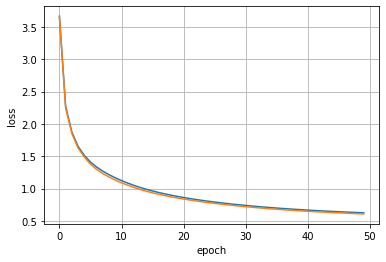

正解率： 0.809


In [31]:
plt.plot(dnn_test2.loss)
plt.plot(dnn_test2.val_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.show()

print('正解率：', metrics.accuracy_score(y_test, pred2))

### AdaGrad + ReLU + SimpleInitializer + 中間層：2層

全然うまく学習してくれない。コードのどこか間違っているかと疑ったが、間違いを見つけられず・・・

初期化方法をHeInitializerにしたら少し改善したためこれが原因？

In [18]:
class ScratchDeepNeuralNetrowkClassifierForTest3(ScratchDeepNeuralNetrowkClassifier):
    """
    テスト実施用。必要箇所だけオーバーライド。
    """
    def fit(self, X, y, X_val=None, y_val=None, sigma=0.01, lr=0.01, epoch=3, optimizer='SGD'):

        # 引数をインスタンス変数へ
        self.sigma = sigma
        self.lr = lr
        self.epoch = epoch

        # 検証データの有無
        self.is_val = np.all(X_val != None) and np.all(y_val != None)

        # 形状・各層のノード数
        self.n_samples = X.shape[0]
        self.n_features = X.shape[1]
        self.inputLayer_nodes = self.n_features
        self.middleLayer1_nodes = 400
        self.middleLayer2_nodes = 200
        self.outputLayer_nodes = 10
        self.optimizer = optimizer

        # 誤差格納用
        self.loss = []
        self.val_loss = []

        # yラベルデータをone-hotへ変換
        y = self._y_one_hot(y)
        if self.is_val:
            y_val = self._y_one_hot(y_val)

        # 最適化手法
        if self.optimizer == 'SGD':
            optimizer = SGD(self.lr)
        elif self.optimizer == 'AdaGrad':
            optimizer = AdaGrad(self.lr)

        # 各層・活性化関数のインスタンス生成
        self.FC1 = FC(SimpleInitializer(self.sigma, self.inputLayer_nodes, self.middleLayer1_nodes), optimizer)
        self.activation1 = ReLU()
        self.FC2 = FC(SimpleInitializer(self.sigma, self.middleLayer1_nodes, self.middleLayer2_nodes), optimizer)
        self.activation2 = ReLU()
        self.FC3 = FC(SimpleInitializer(self.sigma, self.middleLayer2_nodes, self.outputLayer_nodes), optimizer)
        self.activation3 = Softmax()

        # ミニバッチのインスタンス生成
        batch_size = 20
        seed = 47
        getMiniBatch = GetMiniBatch(X, y, batch_size=batch_size, seed=seed)
        if self.is_val:
            val_batch_size = int(X_val.shape[0] / (self.n_samples/batch_size))
            getValMiniBatch = GetMiniBatch(X_val, y_val, batch_size=val_batch_size, seed=seed)
        else:
            getValMiniBatch = np.zeros([self.n_samples, 2])

        for epoch in range(self.epoch):
            for train, val in zip(getMiniBatch, getValMiniBatch):
                mini_X, mini_y = train
                mini_X_val, mini_y_val = val

                # フォワードプロパゲーション
                Z3 = self._forward_propagation(mini_X)
                # バックプロパゲーション
                self._back_propagation(mini_X, mini_y, Z3)

                if self.is_val:
                    # フォワードプロパゲーション
                    val_Z3 = self._forward_propagation(mini_X_val)
                    # 損失関数計算
                    self.activation3.cross_entropy_loss(val_Z3, mini_y_val, self.is_val)

            # バッチ毎の損失の平均取得
            self._get_loss()

            # 学習過程表示
            if self.verbose and epoch % self.interval == 0:
                self._print_loss(epoch)


In [27]:
dnn_test3 = ScratchDeepNeuralNetrowkClassifierForTest3(verbose=True, interval=1)
dnn_test3.fit(X_train, y_train, X_val=X_test, y_val=y_test, sigma=0.01, lr=0.0001, epoch=10, optimizer='AdaGrad')
pred3 = dnn_test3.predict(X_test)

[INFO] epoch : 1 / 10
       Loss(train): 2.3037411917079353
       Loss(test) : 2.303761249186219
[INFO] epoch : 2 / 10
       Loss(train): 2.303721690310648
       Loss(test) : 2.3037309288153653
[INFO] epoch : 3 / 10
       Loss(train): 2.3037068386615287
       Loss(test) : 2.3037153034310296
[INFO] epoch : 4 / 10
       Loss(train): 2.3036953782627108
       Loss(test) : 2.30370320810092
[INFO] epoch : 5 / 10
       Loss(train): 2.303685856943149
       Loss(test) : 2.303693155860843
[INFO] epoch : 6 / 10
       Loss(train): 2.303677653821633
       Loss(test) : 2.3036844410695125
[INFO] epoch : 7 / 10
       Loss(train): 2.3036703926060746
       Loss(test) : 2.303676668752983
[INFO] epoch : 8 / 10
       Loss(train): 2.303663837351642
       Loss(test) : 2.30366966125533
[INFO] epoch : 9 / 10
       Loss(train): 2.303657873421667
       Loss(test) : 2.3036632992171815
[INFO] epoch : 10 / 10
       Loss(train): 2.3036524064637125
       Loss(test) : 2.3036574692810126


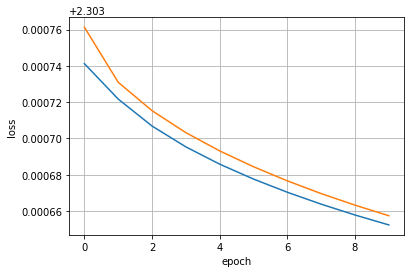

正解率： 0.101


In [28]:
plt.plot(dnn_test3.loss)
plt.plot(dnn_test3.val_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.show()

print('正解率：', metrics.accuracy_score(y_test, pred3))

### AdaGrad + ReLU + HeInitializer + 中間層：2層

学習率を落とさないと収束しなかった。

学習率が低いため、epoch数をもっと増やさないと精度があがらない。

In [21]:
class ScratchDeepNeuralNetrowkClassifierForTest4(ScratchDeepNeuralNetrowkClassifier):
    """
    テスト実施用。必要箇所だけオーバーライド。
    """
    def fit(self, X, y, X_val=None, y_val=None, sigma=0.01, lr=0.01, epoch=3, optimizer='SGD'):

        # 引数をインスタンス変数へ
        self.sigma = sigma
        self.lr = lr
        self.epoch = epoch

        # 検証データの有無
        self.is_val = np.all(X_val != None) and np.all(y_val != None)

        # 形状・各層のノード数
        self.n_samples = X.shape[0]
        self.n_features = X.shape[1]
        self.inputLayer_nodes = self.n_features
        self.middleLayer1_nodes = 400
        self.middleLayer2_nodes = 200
        self.outputLayer_nodes = 10
        self.optimizer = optimizer

        # 誤差格納用
        self.loss = []
        self.val_loss = []

        # yラベルデータをone-hotへ変換
        y = self._y_one_hot(y)
        if self.is_val:
            y_val = self._y_one_hot(y_val)

        # 最適化手法
        if self.optimizer == 'SGD':
            optimizer = SGD(self.lr)
        elif self.optimizer == 'AdaGrad':
            optimizer = AdaGrad(self.lr)

        # 各層・活性化関数のインスタンス生成
        self.FC1 = FC(HeInitializer(self.sigma, self.inputLayer_nodes, self.middleLayer1_nodes), optimizer)
        self.activation1 = ReLU()
        self.FC2 = FC(HeInitializer(self.sigma, self.middleLayer1_nodes, self.middleLayer2_nodes), optimizer)
        self.activation2 = ReLU()
        self.FC3 = FC(HeInitializer(self.sigma, self.middleLayer2_nodes, self.outputLayer_nodes), optimizer)
        self.activation3 = Softmax()

        # ミニバッチのインスタンス生成
        batch_size = 20
        seed = 47
        getMiniBatch = GetMiniBatch(X, y, batch_size=batch_size, seed=seed)
        if self.is_val:
            val_batch_size = int(X_val.shape[0] / (self.n_samples/batch_size))
            getValMiniBatch = GetMiniBatch(X_val, y_val, batch_size=val_batch_size, seed=seed)
        else:
            getValMiniBatch = np.zeros([self.n_samples, 2])

        for epoch in range(self.epoch):
            for train, val in zip(getMiniBatch, getValMiniBatch):
                mini_X, mini_y = train
                mini_X_val, mini_y_val = val

                # フォワードプロパゲーション
                Z3 = self._forward_propagation(mini_X)
                # バックプロパゲーション
                self._back_propagation(mini_X, mini_y, Z3)

                if self.is_val:
                    # フォワードプロパゲーション
                    val_Z3 = self._forward_propagation(mini_X_val)
                    # 損失関数計算
                    self.activation3.cross_entropy_loss(val_Z3, mini_y_val, self.is_val)

            # バッチ毎の損失の平均取得
            self._get_loss()

            # 学習過程表示
            if self.verbose and epoch % self.interval == 0:
                self._print_loss(epoch)


In [22]:
dnn_test4 = ScratchDeepNeuralNetrowkClassifierForTest4(verbose=True, interval=1)
dnn_test4.fit(X_train, y_train, X_val=X_test, y_val=y_test, sigma=0.01, lr=0.001, epoch=10, optimizer='AdaGrad')
pred4 = dnn_test4.predict(X_test)

[INFO] epoch : 1 / 10
       Loss(train): 2.3048945872368245
       Loss(test) : 2.3035488335526417
[INFO] epoch : 2 / 10
       Loss(train): 2.29584085285447
       Loss(test) : 2.294701212147785
[INFO] epoch : 3 / 10
       Loss(train): 2.290764433660094
       Loss(test) : 2.2897027279163287
[INFO] epoch : 4 / 10
       Loss(train): 2.287068859805724
       Loss(test) : 2.2860849669987693
[INFO] epoch : 5 / 10
       Loss(train): 2.2841577823560297
       Loss(test) : 2.283250671765137
[INFO] epoch : 6 / 10
       Loss(train): 2.2817690208099397
       Loss(test) : 2.280938503709101
[INFO] epoch : 7 / 10
       Loss(train): 2.2797563974330974
       Loss(test) : 2.2790074733973547
[INFO] epoch : 8 / 10
       Loss(train): 2.278029598956762
       Loss(test) : 2.2773490178410163
[INFO] epoch : 9 / 10
       Loss(train): 2.2765323191377864
       Loss(test) : 2.27590512721103
[INFO] epoch : 10 / 10
       Loss(train): 2.275225916488162
       Loss(test) : 2.2746519653635637


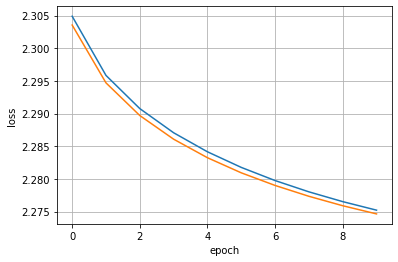

正解率： 0.1145


In [23]:
plt.plot(dnn_test4.loss)
plt.plot(dnn_test4.val_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.show()

print('正解率：', metrics.accuracy_score(y_test, pred4))

### AdaGrad + ReLU + HeInitializer + 中間層：3層（ノード数も少し変更）

In [24]:
class ScratchDeepNeuralNetrowkClassifierForTest5(ScratchDeepNeuralNetrowkClassifier):
    """
    テスト実施用。必要箇所だけオーバーライド。
    """

    def fit(self, X, y, X_val=None, y_val=None, sigma=0.01, lr=0.01, epoch=3, optimizer='SGD'):
        # 引数をインスタンス変数へ
        self.sigma = sigma
        self.lr = lr
        self.epoch = epoch

        # 検証データの有無
        self.is_val = np.all(X_val != None) and np.all(y_val != None)

        # 形状・各層のノード数
        self.n_samples = X.shape[0]
        self.n_features = X.shape[1]
        self.inputLayer_nodes = self.n_features
        self.middleLayer1_nodes = 400
        self.middleLayer2_nodes = 300
        self.middleLayer3_nodes = 200
        self.outputLayer_nodes = 10
        self.optimizer = optimizer

        # 誤差格納用
        self.loss = []
        self.val_loss = []

        # yラベルデータをone-hotへ変換
        y = self._y_one_hot(y)
        if self.is_val:
            y_val = self._y_one_hot(y_val)

        # 最適化手法
        if self.optimizer == 'SGD':
            optimizer = SGD(self.lr)
        elif self.optimizer == 'AdaGrad':
            optimizer = AdaGrad(self.lr)

        # 各層・活性化関数のインスタンス生成
        self.FC1 = FC(HeInitializer(self.sigma, self.inputLayer_nodes, self.middleLayer1_nodes), optimizer)
        self.activation1 = ReLU()
        self.FC2 = FC(HeInitializer(self.sigma, self.middleLayer1_nodes, self.middleLayer2_nodes), optimizer)
        self.activation2 = ReLU()
        self.FC3 = FC(HeInitializer(self.sigma, self.middleLayer2_nodes, self.middleLayer3_nodes), optimizer)
        self.activation3 = ReLU()
        self.FC_last = FC(HeInitializer(self.sigma, self.middleLayer3_nodes, self.outputLayer_nodes), optimizer)
        self.activation_last = Softmax()

        # ミニバッチのインスタンス生成
        batch_size = 20
        seed = 0
        getMiniBatch = GetMiniBatch(X, y, batch_size=batch_size, seed=seed)
        if self.is_val:
            val_batch_size = int(X_val.shape[0] / (self.n_samples/batch_size))
            getValMiniBatch = GetMiniBatch(X_val, y_val, batch_size=val_batch_size, seed=seed)
        else:
            getValMiniBatch = np.zeros([self.n_samples, 2])

        for epoch in range(self.epoch):
            for train, val in zip(getMiniBatch, getValMiniBatch):
                mini_X, mini_y = train
                mini_X_val, mini_y_val = val

                # フォワードプロパゲーション
                Z = self._forward_propagation(mini_X)
                # バックプロパゲーション
                self._back_propagation(mini_X, mini_y, Z)

                if self.is_val:
                    # フォワードプロパゲーション
                    val_Z = self._forward_propagation(mini_X_val)
                    # 損失関数計算
                    self.activation_last.cross_entropy_loss(val_Z, mini_y_val, self.is_val)

            # バッチ毎の損失の平均取得
            self._get_loss()

            # 学習過程表示
            if self.verbose and epoch % self.interval == 0:
                self._print_loss(epoch)


    def _forward_propagation(self, X):
        """
        フォワードプロパゲーション
        """
        A1 = self.FC1.forward(X)
        Z1 = self.activation1.forward(A1)
        A2 = self.FC2.forward(Z1)
        Z2 = self.activation2.forward(A2)
        A3 = self.FC3.forward(Z2)
        Z3 = self.activation3.forward(A3)
        A_last = self.FC_last.forward(Z3)
        Z_last = self.activation_last.forward(A_last)
        return Z_last


    def _back_propagation(self, X, y, Z_last):
        """
        バックプロパゲーション
        """
        dA_last = self.activation_last.backward(Z_last, y) # 交差エントロピー誤差とソフトマックスを合わせている
        dZ3 = self.FC_last.backward(dA_last)
        dA3 = self.activation3.backward(dZ3)
        dZ2 = self.FC3.backward(dA3)
        dA2 = self.activation2.backward(dZ2)
        dZ1 = self.FC2.backward(dA2)
        dA1 = self.activation1.backward(dZ1)
        _ = self.FC1.backward(dA1)


    def _get_loss(self):
        """
        損失取得処理
        """
        self.loss.append(np.mean(self.activation_last.loss))
        self.activation_last.loss = []
        if self.is_val:
            self.val_loss.append(np.mean(self.activation_last.val_loss))
            self.activation_last.val_loss = []


In [25]:
dnn_test5 = ScratchDeepNeuralNetrowkClassifierForTest5(verbose=True, interval=1)
dnn_test5.fit(X_train, y_train, X_val=X_test, y_val=y_test, sigma=0.01, lr=0.001, epoch=10, optimizer='AdaGrad')
pred5 = dnn_test5.predict(X_test)

[INFO] epoch : 1 / 10
       Loss(train): 2.34505075390165
       Loss(test) : 2.336620610944015
[INFO] epoch : 2 / 10
       Loss(train): 2.3352415086726057
       Loss(test) : 2.327245615387964
[INFO] epoch : 3 / 10
       Loss(train): 2.329899917067492
       Loss(test) : 2.322278495542909
[INFO] epoch : 4 / 10
       Loss(train): 2.3260886941155023
       Loss(test) : 2.318768770221147
[INFO] epoch : 5 / 10
       Loss(train): 2.3231159181522436
       Loss(test) : 2.3160248600970528
[INFO] epoch : 6 / 10
       Loss(train): 2.3206683225599476
       Loss(test) : 2.313761119517519
[INFO] epoch : 7 / 10
       Loss(train): 2.3186059519532423
       Loss(test) : 2.3118553635388754
[INFO] epoch : 8 / 10
       Loss(train): 2.3168404052638616
       Loss(test) : 2.310194842329476
[INFO] epoch : 9 / 10
       Loss(train): 2.315302155102337
       Loss(test) : 2.3087268055117383
[INFO] epoch : 10 / 10
       Loss(train): 2.313946129909819
       Loss(test) : 2.307450109052769


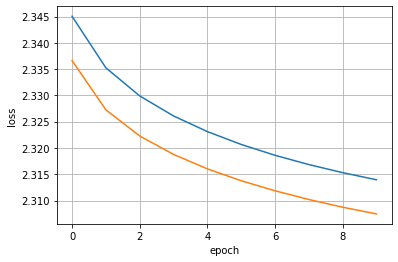

正解率： 0.1276


In [26]:
plt.plot(dnn_test5.loss)
plt.plot(dnn_test5.val_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.show()

print('正解率：', metrics.accuracy_score(y_test, pred5))